# import the library

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0,9.0)

## import the dataset

In [2]:
data = pd.read_csv('master.csv')

In [3]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,15,66,24,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,15,66,24,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,15,66,24,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,15,66,24,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,15,66,24,900",796,Boomers


In [4]:
data.shape

(27820, 12)

In [5]:
# Describing the dataset
data.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


# columns

In [6]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

# renaming the Columns

In [7]:
data = data.rename(columns={'country':'Country','year':'Year','sex':'Gender','age':'Age','suicides_no':'SuicidesNo',
                          'population':'Population','suicides/100k pop':'Suicides100kPop','country-year':'CountryYear',
                          'HDI for year':'HDIForYear',' gdp_for_year ($) ':'GdpForYear',
                          'gdp_per_capita ($)':'GdpPerCapital','generation':'Generation'})

In [8]:
data.head()

,Country,Year,Gender,Age,SuicidesNo,Population,Suicides100kPop,CountryYear,HDIForYear,GdpForYear,GdpPerCapital,Generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,15,66,24,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,15,66,24,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,15,66,24,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,15,66,24,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,15,66,24,900",796,Boomers


#  Handling the missing values

In [9]:
data.isnull().sum()

Country                0
Year                   0
Gender                 0
Age                    0
SuicidesNo             0
Population             0
Suicides100kPop        0
CountryYear            0
HDIForYear         19456
GdpForYear             0
GdpPerCapital          0
Generation             0
dtype: int64

In [10]:
data = data.drop(['HDIForYear', 'CountryYear'],axis=1)

In [11]:
data.head()

,Country,Year,Gender,Age,SuicidesNo,Population,Suicides100kPop,GdpForYear,GdpPerCapital,Generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,15,66,24,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,15,66,24,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,15,66,24,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,15,66,24,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,15,66,24,900",796,Boomers


# data visualization

## Sucide count according to country

In [12]:
data['Country'].unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

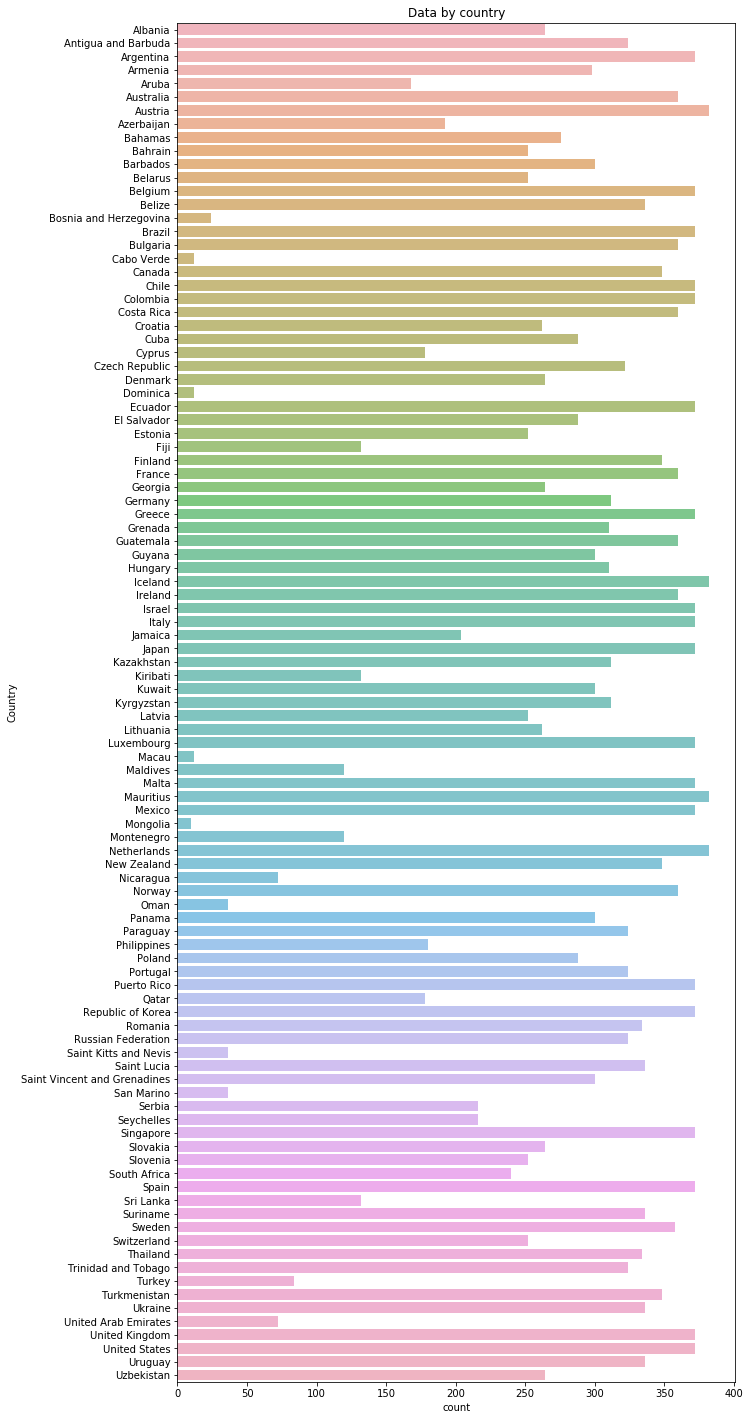

In [13]:
alpha = 0.7
plt.figure(figsize=(10,25))
sns.countplot(y ='Country', data=data, alpha=alpha)
plt.title('Data by country')
plt.show()

In [14]:
data1 = data.groupby('Country').agg({'SuicidesNo':'sum'}).sort_values(by='SuicidesNo', ascending = False)
data1 = data1.head(20)
data1

,SuicidesNo
Country,
Russian Federation,1209742
United States,1034013
Japan,806902
France,329127
Ukraine,319950
Germany,291262
Republic of Korea,261730
Brazil,226613
Poland,139098


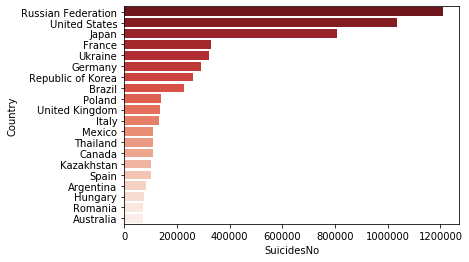

In [15]:
sns.barplot(data1['SuicidesNo'],data1.index, palette='Reds_r')


##  count according to gender

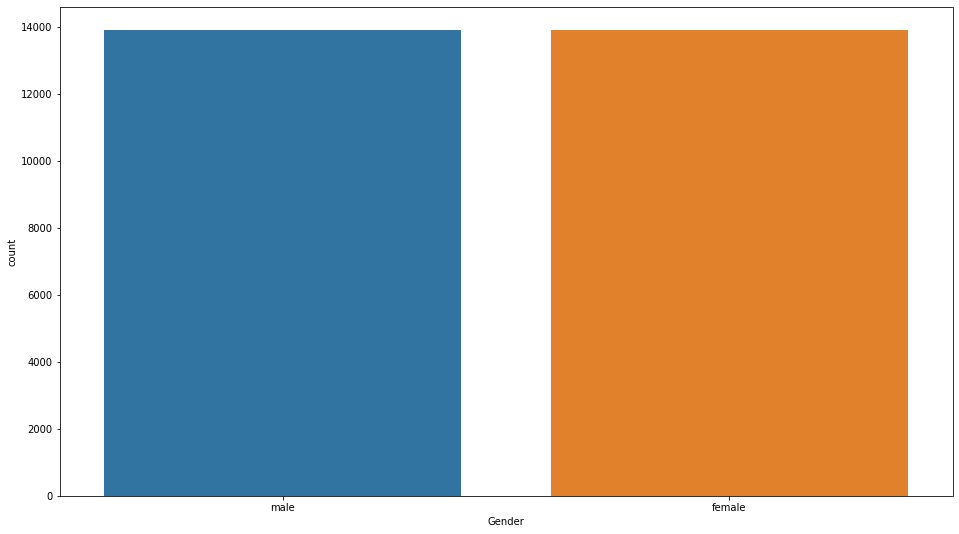

In [16]:
plt.figure(figsize=(16,9))
sex = sns.countplot(x='Gender', data=data)

In [17]:
data2 = data.groupby('Gender').agg({'SuicidesNo':'sum'}).sort_values(by='SuicidesNo', ascending = False)
data2 = data2.head(20)

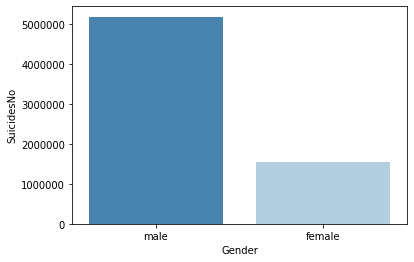

In [18]:
sns.barplot(data2.index, data2['SuicidesNo'], palette='Blues_r')

## Sucide  count according to Age

In [19]:
#unique values
pd.unique(data['Age'])

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [20]:
data3 = data.groupby('Age').agg({'SuicidesNo':'sum'}).sort_values(by='SuicidesNo', ascending = False)
data3

,SuicidesNo
Age,
35-54 years,2452141
55-74 years,1658443
25-34 years,1123912
15-24 years,808542
75+ years,653118
5-14 years,52264


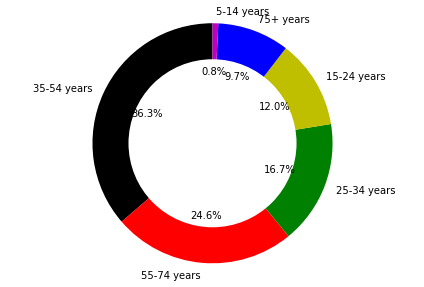

In [21]:
# Pie chart
labels = data3.index
sizes = data3['SuicidesNo']
#colors
colors = ['k','r','g','y','b','m']
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

## Sucide  count according to year

In [22]:
data['Year'].unique()

array([1987, 1988, 1989, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       1985, 1986, 1990, 1991, 2012, 2013, 2014, 2015, 2011, 2016],
      dtype=int64)

In [23]:
data4 = data.groupby('Year').agg({'SuicidesNo':'sum'}).sort_values(by='SuicidesNo', ascending = False)

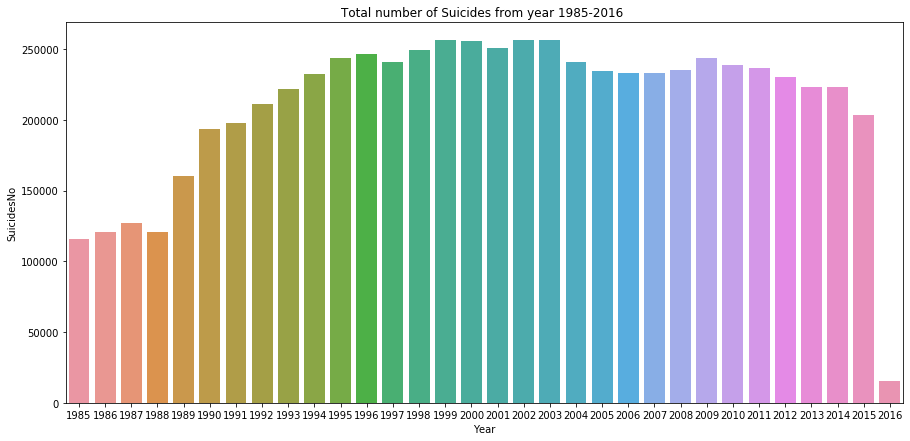

In [24]:
plt.figure(figsize=(15,7))
sns.barplot(data4.index, data4['SuicidesNo'])
plt.title('Total number of Suicides from year 1985-2016 ')
plt.show()

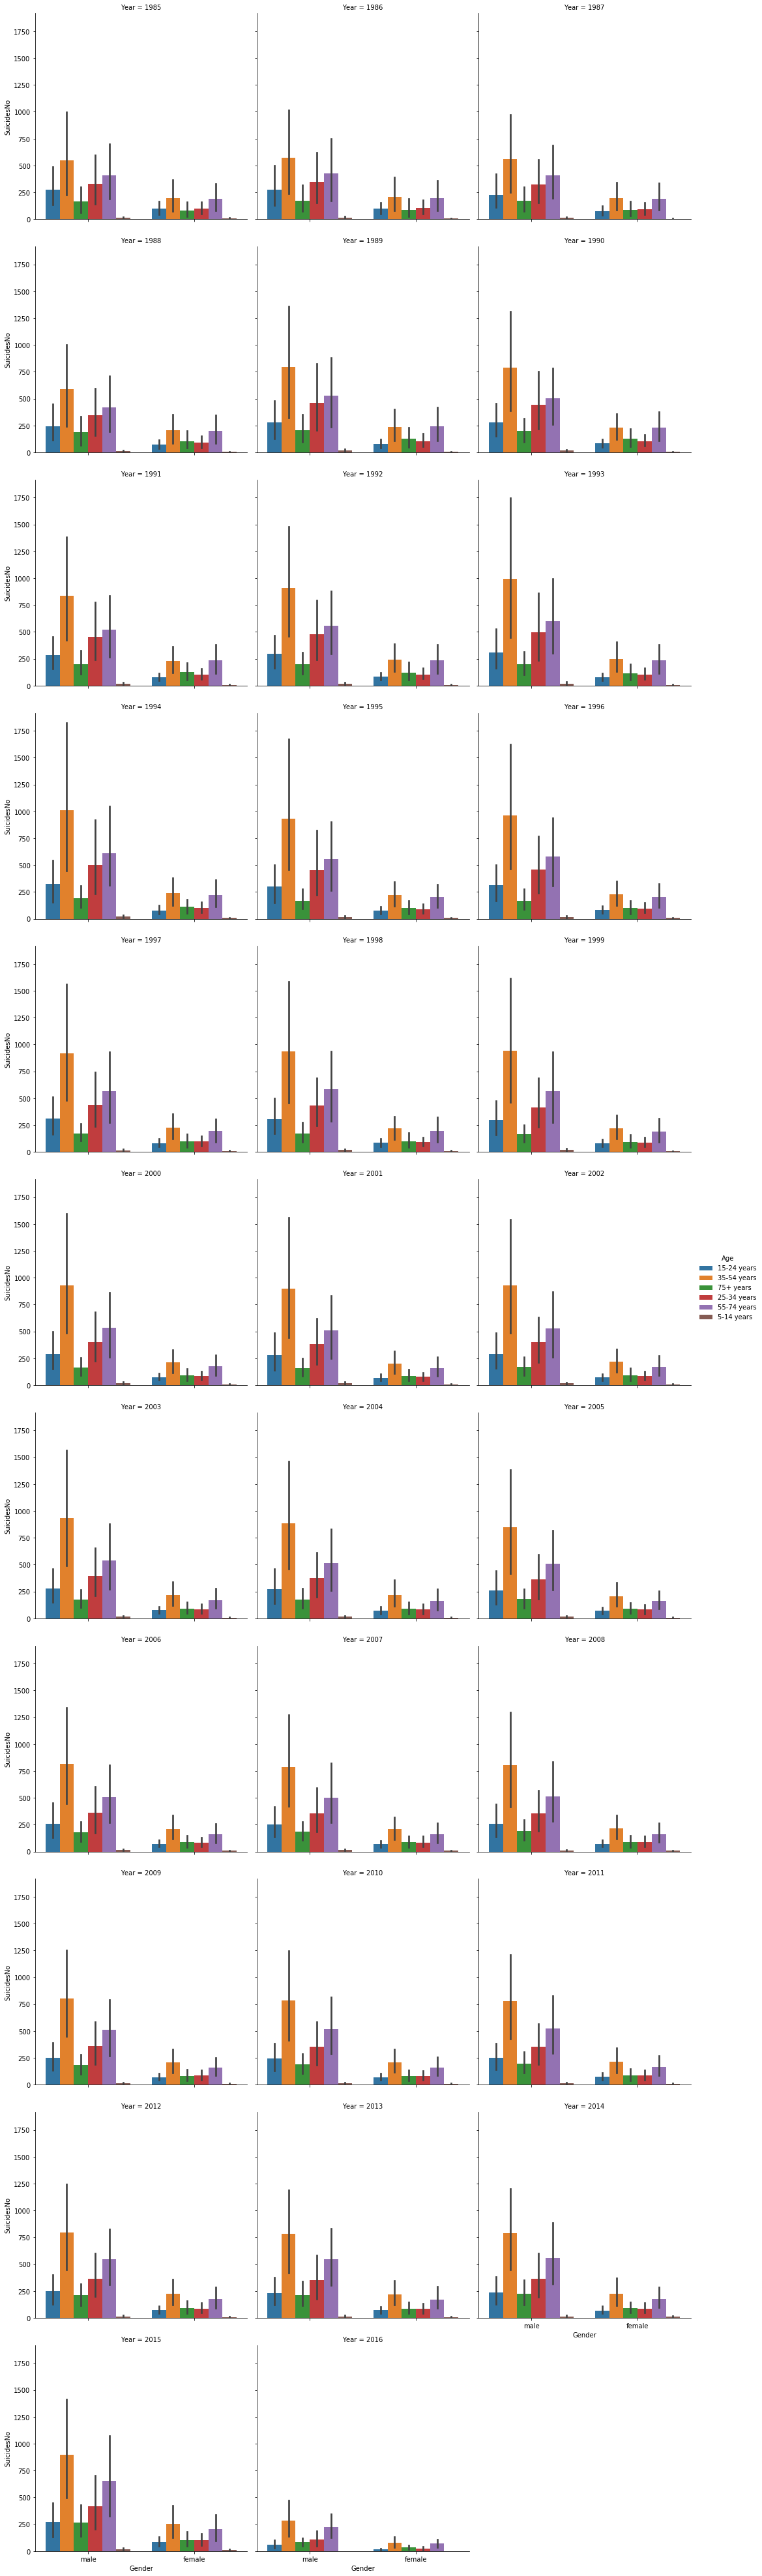

In [25]:
cat_accord_year = sns.catplot('Gender','SuicidesNo',hue='Age',col='Year',data=data,kind='bar',col_wrap=3)

## death acc to Generation

In [26]:
data5 = data.groupby('Generation').agg({'SuicidesNo':'sum'}).sort_values(by='SuicidesNo', ascending = False)
data5

,SuicidesNo
Generation,
Boomers,2284498
Silent,1781744
Generation X,1532804
Millenials,623459
G.I. Generation,510009
Generation Z,15906


In [27]:
data6 = data.groupby('Generation').agg({'Suicides100kPop':'sum'}).sort_values(by='Suicides100kPop', ascending = True)
data6.head()

,Suicides100kPop
Generation,
Generation Z,944.18
Millenials,31461.74
G.I. Generation,65708.86
Generation X,67648.45
Boomers,73563.05


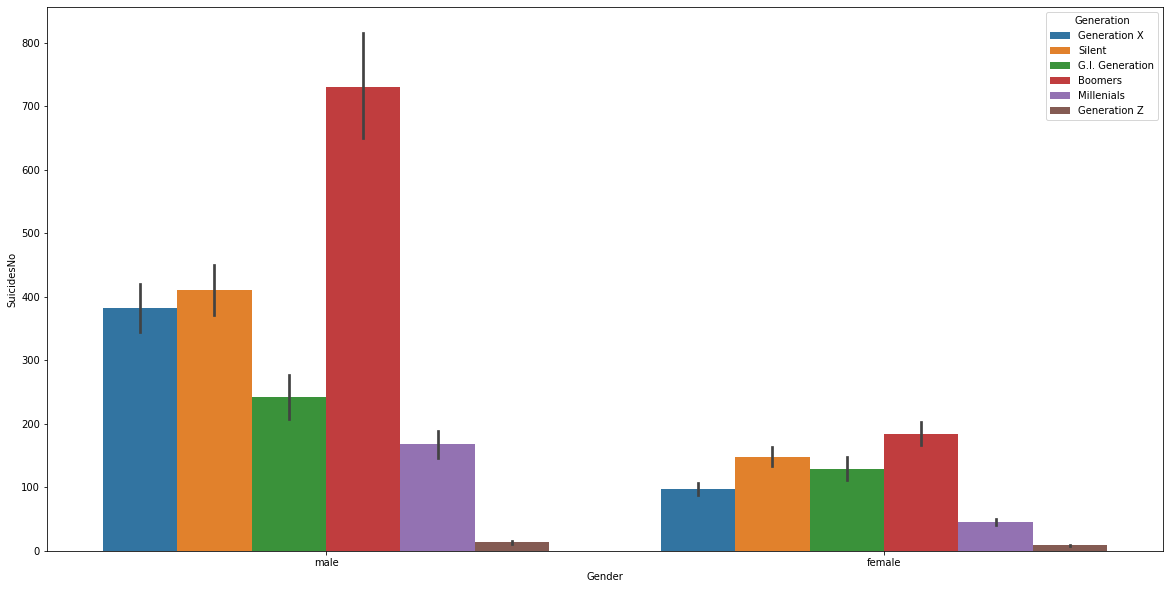

In [28]:
plt.figure(figsize=(20,10))
bar_gen = sns.barplot(x='Gender',y='SuicidesNo',hue='Generation',data=data)

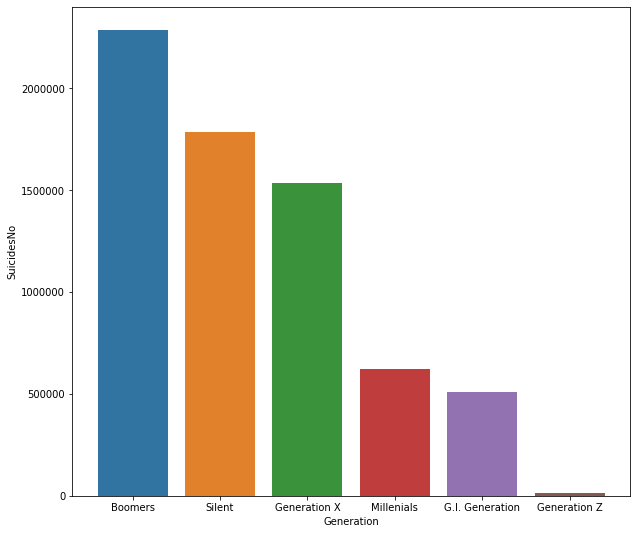

In [29]:
plt.figure(figsize=(10,9))
sns.barplot(data5.index,data5['SuicidesNo'])
plt.plot()
plt.show()

In [30]:
data7 =data.groupby('Generation').agg({'Population':'sum'}).sort_values(by='Population', ascending = True)
data7 
data7['suicides'] = data6.values
data7['suicide_percentage'] = (data7['suicides']/ data7['Population'])*100
data7.sort_values(by='suicide_percentage', ascending = False)

,Population,suicides,suicide_percentage
Generation,,,
Generation Z,2503541842,31461.74,0.001257
Generation X,13472109292,117217.55,0.000870
Silent,9220331647,65708.86,0.000713
Millenials,10649461202,67648.45,0.000635
Boomers,13350511729,73563.05,0.000551
G.I. Generation,2126202724,944.18,0.000044


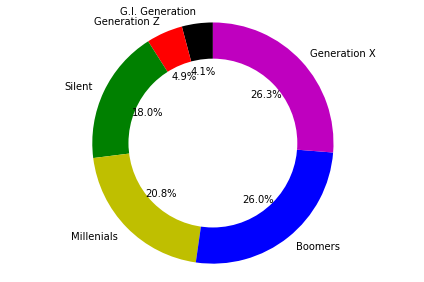

In [31]:
# Pie chart
labels = data7.index
sizes = data7['Population']
#colors
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

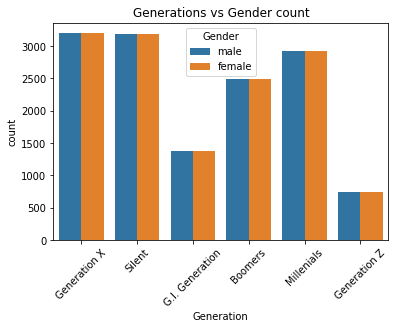

In [32]:
sns.countplot(x='Generation',hue ="Gender",
                 data=data)
plt.xticks(rotation=45)
plt.title('Generations vs Gender count')
plt.show()

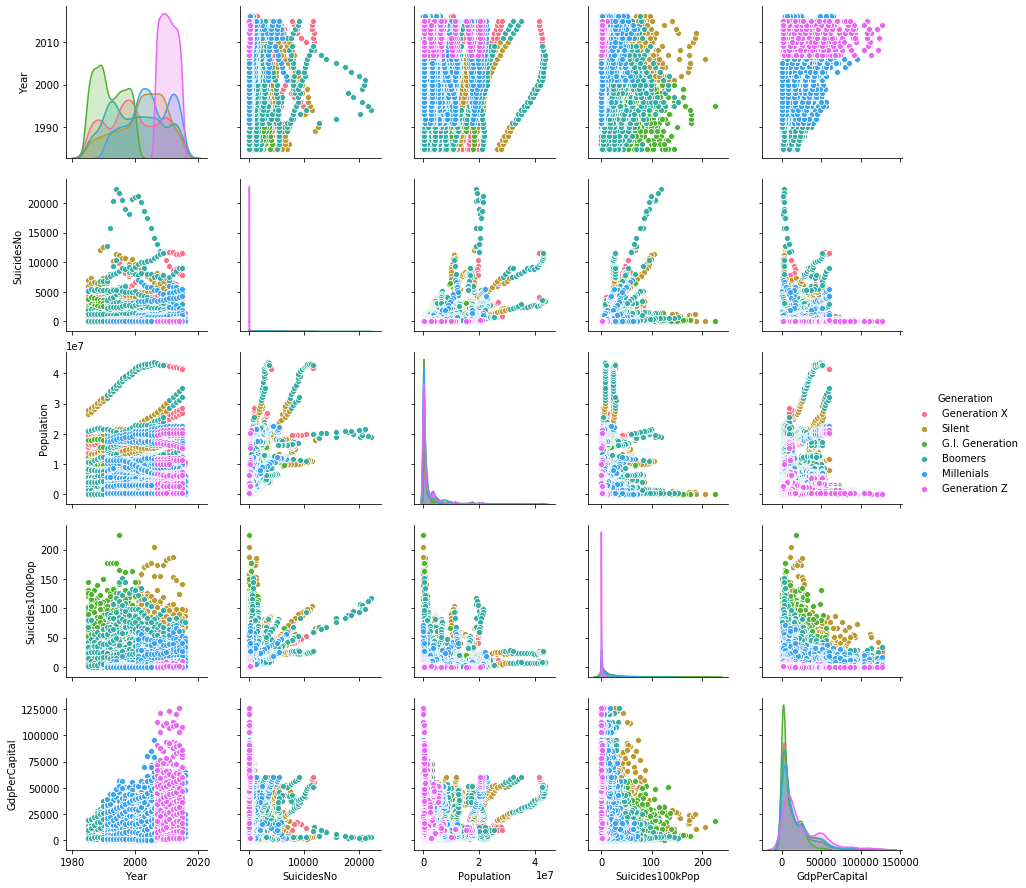

In [33]:
sns.pairplot(data, hue= "Generation", diag_kind = "kde", kind = "scatter", palette = "husl")
plt.show()

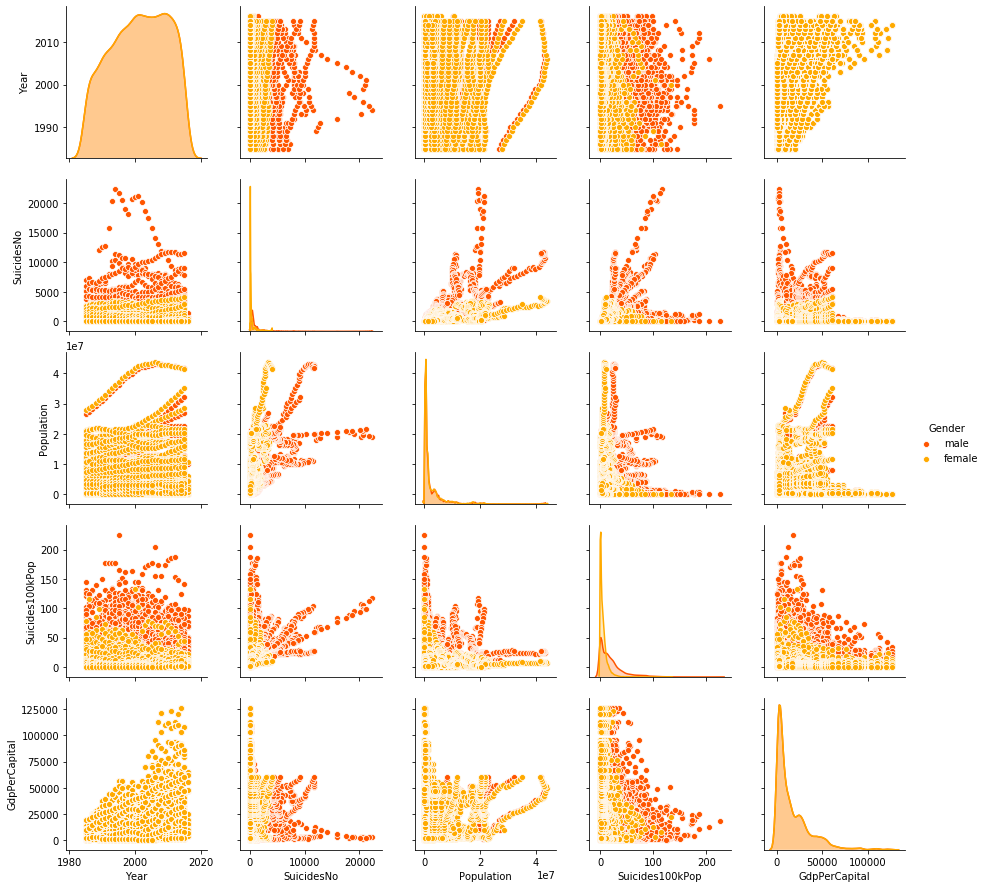

In [34]:
sns.pairplot(data, hue= "Gender", diag_kind = "kde", kind = "scatter", palette = "autumn")
plt.show()

## heat map

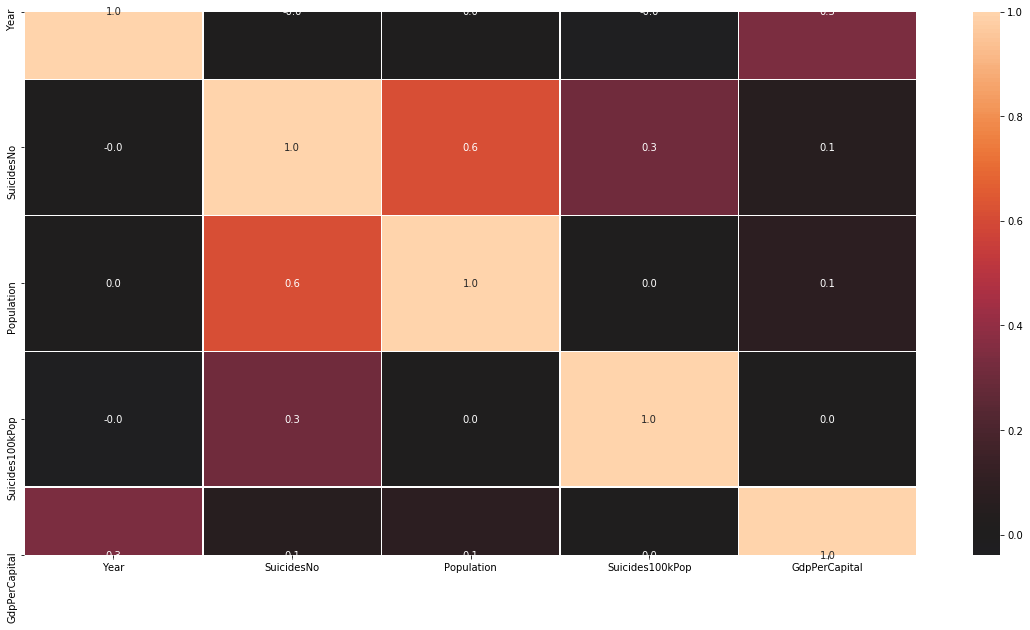

In [35]:
plt.figure(figsize=(20,10))
cor = sns.heatmap(data.corr(),center =0 ,annot =True,linewidths=.5, fmt= '.1f')